In [1]:
import numpy as np
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## task 8.1

In [2]:
A = np.array([[1, 2, 0], [0, 0, 5], [3, -4, 2], [1, 6, 5], [0, 1, 0]])

In [3]:
U, s, W = np.linalg.svd(A)

In [4]:
V = W.T

In [5]:
s

array([8.82486885, 6.14060608, 2.53271528])

In [6]:
D = np.zeros_like(A, dtype=float)
D[np.diag_indices(min(A.shape))] = s

In [7]:
U, D, V

(array([[ 0.17056501,  0.15680918, -0.53077508, -0.79905375, -0.16158397],
        [ 0.39287016, -0.52933945,  0.6134793 , -0.43375771,  0.03082495],
        [-0.14366152, -0.82449256, -0.52379105,  0.14049848,  0.07400343],
        [ 0.88843702,  0.06074346, -0.24655277,  0.37755832, -0.06042632],
        [ 0.08125046,  0.10831843, -0.08231425, -0.10524851,  0.98173958]]),
 array([[8.82486885, 0.        , 0.        ],
        [0.        , 6.14060608, 0.        ],
        [0.        , 0.        , 2.53271528],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]]),
 array([[ 0.07116451, -0.36737824, -0.92734505],
        [ 0.71702467,  0.66514082, -0.20847855],
        [ 0.69340553, -0.65009301,  0.31075368]]))

## task 8.2

In [8]:
Ae1 = s[0]
Ae1

8.824868854820442

In [9]:
Ae = np.linalg.norm(A, 2) # Евклидова норма
Ae

8.824868854820444

In [10]:
Af1 = np.sqrt(sum(map(lambda x:x**2, s)))
Af1

11.045361017187261

In [11]:
Af = np.linalg.norm(A) # норма Фробениуса
Af

11.045361017187261

## extra task

### import data

In [12]:
iris = datasets.load_iris()

In [13]:
iris_frame = pd.DataFrame(iris.data)
iris_frame.columns = iris.feature_names
iris_frame['target'] = iris.target
iris_frame['name'] = iris_frame.target.apply(lambda x : iris.target_names[x])
iris_frame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [14]:
data = iris_frame.iloc[:, :4]
y = iris_frame.iloc[:, 4]

### corr check

<AxesSubplot:>

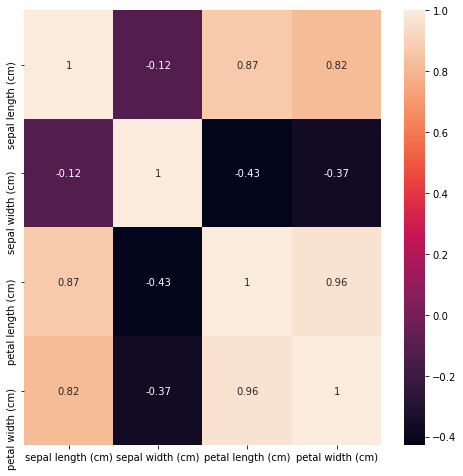

In [15]:
corr = pd.DataFrame(data).corr()
mask = np.zeros_like(corr)
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corr, annot=True, ax=ax)

### SVD decomposition

In [16]:
U, s, V = np.linalg.svd(data)
s

array([95.95991387, 17.76103366,  3.46093093,  1.88482631])

In [17]:
# 2 singular values
# np.mat(np.eye(2)*s[:2])

### new dataset

In [18]:
newdata = U[:,:2]
newdata = pd.DataFrame(newdata)
newdata.columns=['SVD1','SVD2']
newdata.head()

,SVD1,SVD2
0,-0.061617,0.129611
1,-0.058071,0.111020
2,-0.056763,0.117966
3,-0.056653,0.105308
4,-0.061230,0.131090


### Original dataset vs new data model training

#### original dataset

In [19]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.40, random_state = 42)

In [20]:
model = RandomForestClassifier(oob_score = True, random_state = 42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [21]:
model.oob_score_

0.9444444444444444

In [22]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[23,  0,  0],
       [ 0, 19,  0],
       [ 0,  1, 17]], dtype=int64)

In [23]:
accuracy_score(y_test, y_pred)

0.9833333333333333

#### new dataset

In [24]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(newdata, y, test_size = 0.40, random_state = 42)

In [25]:
model_new = RandomForestClassifier(oob_score = True, random_state = 42)
model_new.fit(X_train_new, y_train_new)
y_pred_new = model_new.predict(X_test_new)

In [26]:
model_new.oob_score_

0.9666666666666667

In [27]:
cm_new = confusion_matrix(y_test_new, y_pred_new)
cm_new

array([[23,  0,  0],
       [ 0, 18,  1],
       [ 0,  0, 18]], dtype=int64)

In [28]:
accuracy_score(y_test_new, y_pred_new)

0.9833333333333333